In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import scipy
import statistics
import seaborn as sns 
from scipy import stats

plt.figure(figsize=(20,20))
%matplotlib inline

In [ ]:
# Nhập dữ liệu

dt = pd.read_csv("Inc_Exp_Data.csv")
dt.head(15)

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1
5,14000,8000,2,0,196560,Graduate,1
6,15000,16000,3,35000,167400,Post-Graduate,1
7,18000,20000,5,8000,216000,Graduate,1
8,19000,9000,2,0,218880,Under-Graduate,1
9,20000,9000,4,0,220800,Under-Graduate,2


In [ ]:
# Xem thông tin dữ liệu trong df

dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mthly_HH_Income           50 non-null     int64 
 1   Mthly_HH_Expense          50 non-null     int64 
 2   No_of_Fly_Members         50 non-null     int64 
 3   Emi_or_Rent_Amt           50 non-null     int64 
 4   Annual_HH_Income          50 non-null     int64 
 5   Highest_Qualified_Member  50 non-null     object
 6   No_of_Earning_Members     50 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.9+ KB


# **Distribution**

In [ ]:
type_income = []
dt1=dt.copy()
for x in dt1['Mthly_HH_Income']:
    if x <= 20000:
        type_income.append('Thấp')
    elif x <= 50000:
        type_income.append('Trung bình')
    elif x <= 80000:
        type_income.append('Cao')
    else:
        type_income.append('Rất cao')
dt1.insert(7, "Type_Income", type_income)
dt1.head(15)

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members,Type_Income
0,5000,8000,3,2000,64200,Under-Graduate,1,Thấp
1,6000,7000,2,3000,79920,Illiterate,1,Thấp
2,10000,4500,2,0,112800,Under-Graduate,1,Thấp
3,10000,2000,1,0,97200,Illiterate,1,Thấp
4,12500,12000,2,3000,147000,Graduate,1,Thấp
5,14000,8000,2,0,196560,Graduate,1,Thấp
6,15000,16000,3,35000,167400,Post-Graduate,1,Thấp
7,18000,20000,5,8000,216000,Graduate,1,Thấp
8,19000,9000,2,0,218880,Under-Graduate,1,Thấp
9,20000,9000,4,0,220800,Under-Graduate,2,Thấp


In [ ]:
# Bảng thống kê phần trăm thu nhập với
# các mức thu nhập rất cao, cao, trung bình, thấp

TI = dt1.groupby('Type_Income')['Type_Income'].count()
TI = pd.DataFrame(TI)
TI.columns = ['%']
ti_le = (TI/sum(TI['%']))*100
ti_le

,%
Type_Income,
Cao,14.0
Rất cao,12.0
Thấp,22.0
Trung bình,52.0


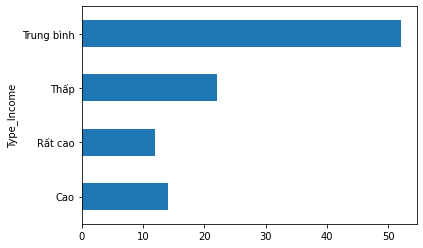

In [ ]:
ti_le['%'].plot(x="Type_Income",y="%",kind="barh")
plt.show()

In [ ]:
type_expense = []

for x in dt1['Mthly_HH_Expense']:
    if x <= 8000:
        type_expense.append('Thấp')
    elif x <= 20000:
        type_expense.append('Trung bình')
    elif x <= 40000:
        type_expense.append('Cao')
    else:
        type_expense.append('Rất cao')
dt1.insert(8, "Type_Expense", type_expense)
dt1.head(15)

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members,Type_Income,Type_Expense
0,5000,8000,3,2000,64200,Under-Graduate,1,Thấp,Thấp
1,6000,7000,2,3000,79920,Illiterate,1,Thấp,Thấp
2,10000,4500,2,0,112800,Under-Graduate,1,Thấp,Thấp
3,10000,2000,1,0,97200,Illiterate,1,Thấp,Thấp
4,12500,12000,2,3000,147000,Graduate,1,Thấp,Trung bình
5,14000,8000,2,0,196560,Graduate,1,Thấp,Thấp
6,15000,16000,3,35000,167400,Post-Graduate,1,Thấp,Trung bình
7,18000,20000,5,8000,216000,Graduate,1,Thấp,Trung bình
8,19000,9000,2,0,218880,Under-Graduate,1,Thấp,Trung bình
9,20000,9000,4,0,220800,Under-Graduate,2,Thấp,Trung bình


In [ ]:
# Bảng thống kê phần trăm chi với
# các mức thu nhập rất cao, cao, trung bình, thấp

TE = dt1.groupby('Type_Expense')['Type_Expense'].count()
TE = pd.DataFrame(TE)
TE.columns = ['%']
ti_le_1 = (TE/sum(TE['%']))*100
ti_le_1

,%
Type_Expense,
Cao,24.0
Rất cao,8.0
Thấp,16.0
Trung bình,52.0


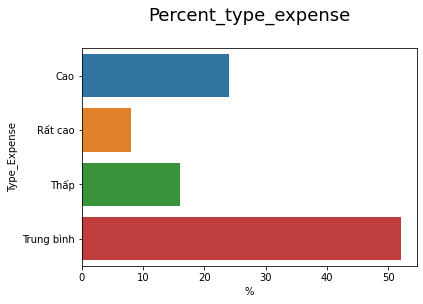

In [ ]:
ti_le_1.reset_index(inplace=True)
sns.barplot(y='Type_Expense',x='%',data = ti_le_1 )
plt.title('Percent_type_expense', color = 'black', y = 1.1, fontsize = 18)

plt.show()

In [ ]:
# Bảng thống kê tỉ lệ trình độ học vấn cao nhất

x = dt1.groupby('Highest_Qualified_Member')['Highest_Qualified_Member'].count()
x = pd.DataFrame(x)
x.columns = ['%']
Highest_Qualified_Member = x/sum(x['%'])*100
Highest_Qualified_Member

,%
Highest_Qualified_Member,
Graduate,38.0
Illiterate,10.0
Post-Graduate,12.0
Professional,20.0
Under-Graduate,20.0


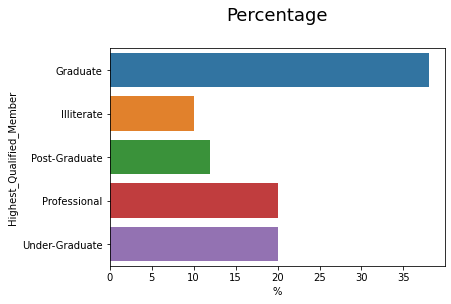

In [ ]:
Highest_Qualified_Member.reset_index(inplace=True)
sns.barplot(y='Highest_Qualified_Member',x='%',data = Highest_Qualified_Member )
plt.title('Percentage', color = 'black', y = 1.1, fontsize = 18)
plt.show()

In [ ]:
#Bảng thống kê số người trong gia đình:

NoFM = dt1.groupby('No_of_Fly_Members')['No_of_Fly_Members'].count()
NoFM = pd.DataFrame(NoFM)
NoFM.columns = ['%']
NoFM1 = NoFM/sum(NoFM['%'])*100
NoFM1

,%
No_of_Fly_Members,
1,2.0
2,16.0
3,18.0
4,30.0
5,10.0
6,20.0
7,4.0


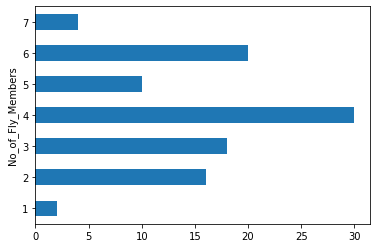

In [ ]:
NoFM1['%'].plot(x="No_of_Fly_Members",y="%",kind="barh")

In [ ]:
#Bảng thống kê chi phí nộp thêm hằng năm

EoRA = dt1.groupby('Emi_or_Rent_Amt')['Emi_or_Rent_Amt'].count()
EoRA = pd.DataFrame(EoRA)
EoRA.columns = ['%']
EoRA1 = EoRA/sum(EoRA['%'])*100
EoRA1

,%
Emi_or_Rent_Amt,
0,60.0
1000,2.0
2000,4.0
2500,2.0
3000,4.0
3500,6.0
4000,2.0
5000,4.0
8000,4.0


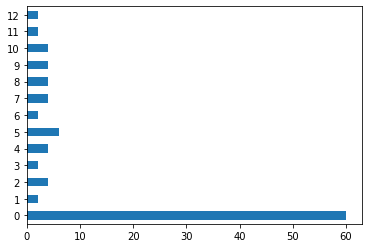

In [ ]:
EoRA1['%'].plot(x="Emi_or_Rent_Amt",y="%",kind="barh")

In [ ]:
#Bảng thống kê thu nhập hằng năm

AHI = dt1['Annual_HH_Income']
AHI.head(10)

0     64200
1     79920
2    112800
3     97200
4    147000
5    196560
6    167400
7    216000
8    218880
9    220800
Name: Annual_HH_Income, dtype: int64

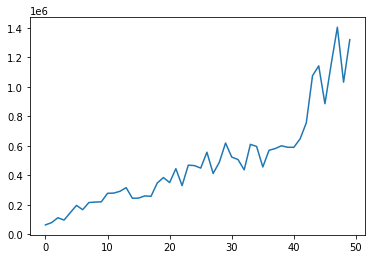

In [ ]:

AHI.plot(x = '', y = 'Annual_HH_Income',kind = 'line')


In [ ]:
#Bảng thống kê người kiếm ra tiền

NoEM = dt1.groupby('No_of_Earning_Members')['No_of_Earning_Members'].count()
NoEM = pd.DataFrame(NoEM)
NoEM.columns = ['%']
NoEM1 = NoEM/sum(NoEM['%'])*100
NoEM1

,%
No_of_Earning_Members,
1,66.0
2,24.0
3,8.0
4,2.0


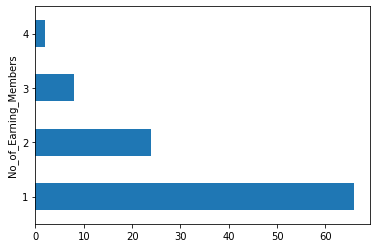

In [ ]:
NoEM1['%'].plot(x="No_of_Earning_Members",y="%",kind="barh")

In [ ]:

n=len(dt1['Mthly_HH_Expense'])
Type_residual = []
for i in range(n):
  h = dt1['Mthly_HH_Income'][i]-dt1['Mthly_HH_Expense'][i]
  if h<0:
    Type_residual.append('Thiếu')
  elif h<=10000:
    Type_residual.append('Đủ ăn')
  elif h>10000:
    Type_residual.append("Dư giả")
dt1.insert(9, "Type_residual", Type_residual)
dt1.head(15)


,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members,Type_Income,Type_Expense,Type_residual
0,5000,8000,3,2000,64200,Under-Graduate,1,Thấp,Thấp,Thiếu
1,6000,7000,2,3000,79920,Illiterate,1,Thấp,Thấp,Thiếu
2,10000,4500,2,0,112800,Under-Graduate,1,Thấp,Thấp,Đủ ăn
3,10000,2000,1,0,97200,Illiterate,1,Thấp,Thấp,Đủ ăn
4,12500,12000,2,3000,147000,Graduate,1,Thấp,Trung bình,Đủ ăn
5,14000,8000,2,0,196560,Graduate,1,Thấp,Thấp,Đủ ăn
6,15000,16000,3,35000,167400,Post-Graduate,1,Thấp,Trung bình,Thiếu
7,18000,20000,5,8000,216000,Graduate,1,Thấp,Trung bình,Thiếu
8,19000,9000,2,0,218880,Under-Graduate,1,Thấp,Trung bình,Đủ ăn
9,20000,9000,4,0,220800,Under-Graduate,2,Thấp,Trung bình,Dư giả


In [ ]:
# Bảng thống kê tỉ lệ thu nhập so với chi tiêu

TR = dt1.groupby('Type_residual')['Type_residual'].count()
TR = pd.DataFrame(TR)
TR.columns = ['%']
Type_residual = TR/sum(x['%'])*100
Type_residual

,%
Type_residual,
Dư giả,64.0
Thiếu,10.0
Đủ ăn,26.0


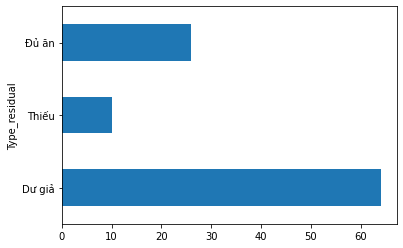

In [ ]:
Type_residual['%'].plot(x="Type_residual",y="%",kind="barh")

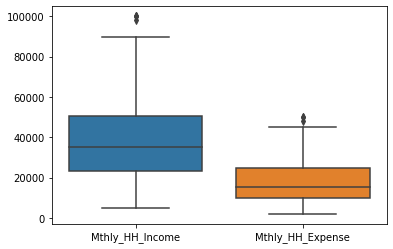

In [ ]:
# boxplot so sánh thu chi hằng tháng

sns.boxplot(data=dt[['Mthly_HH_Income','Mthly_HH_Expense']])

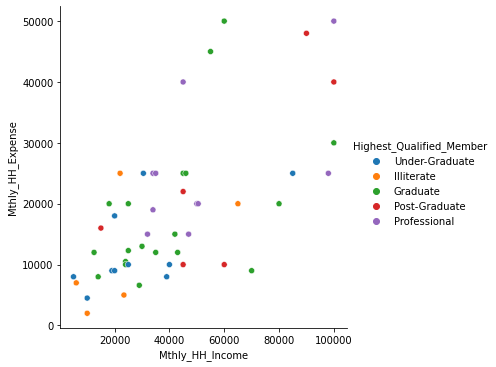

In [ ]:
#Thống kê về chi tiêu hằng tháng so với trình độ học vấn

sns.relplot(data=dt, x="Mthly_HH_Income", y="Mthly_HH_Expense", hue='Highest_Qualified_Member',kind='scatter')

In [ ]:
n=len(dt1['No_of_Fly_Members'])
nguoi_khong_co_thu_nhap = []
for i in range(n):
  h = dt1['No_of_Fly_Members'][i]-dt1['No_of_Earning_Members'][i]
  nguoi_khong_co_thu_nhap.append(h)
dt1.insert(10, "Người Không Có Thu Nhập", nguoi_khong_co_thu_nhap)
dt1.head(15)

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members,Type_Income,Type_Expense,Type_residual,Người Không Có Thu Nhập
0,5000,8000,3,2000,64200,Under-Graduate,1,Thấp,Thấp,Thiếu,2
1,6000,7000,2,3000,79920,Illiterate,1,Thấp,Thấp,Thiếu,1
2,10000,4500,2,0,112800,Under-Graduate,1,Thấp,Thấp,Đủ ăn,1
3,10000,2000,1,0,97200,Illiterate,1,Thấp,Thấp,Đủ ăn,0
4,12500,12000,2,3000,147000,Graduate,1,Thấp,Trung bình,Đủ ăn,1
5,14000,8000,2,0,196560,Graduate,1,Thấp,Thấp,Đủ ăn,1
6,15000,16000,3,35000,167400,Post-Graduate,1,Thấp,Trung bình,Thiếu,2
7,18000,20000,5,8000,216000,Graduate,1,Thấp,Trung bình,Thiếu,4
8,19000,9000,2,0,218880,Under-Graduate,1,Thấp,Trung bình,Đủ ăn,1
9,20000,9000,4,0,220800,Under-Graduate,2,Thấp,Trung bình,Dư giả,2


In [ ]:
NKCTN = dt1.groupby('Người Không Có Thu Nhập')['Người Không Có Thu Nhập'].count()
NKCTN = pd.DataFrame(NKCTN)
NKCTN.columns = ['%']
NKCTN = NKCTN/sum(NKCTN['%'])*100
NKCTN

,%
Người Không Có Thu Nhập,
0,2.0
1,18.0
2,28.0
3,30.0
4,14.0
5,8.0


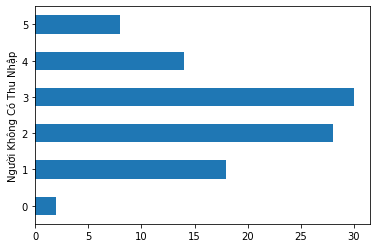

In [ ]:
NKCTN['%'].plot(x = "Người Không Có Thu Nhập",y = '%', kind = 'barh')

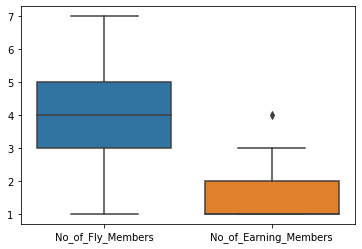

In [ ]:
#boxplot so sánh số thành viên trong gia đình và số thành viên kiếm được tiền
sns.boxplot(data=dt[['No_of_Fly_Members','No_of_Earning_Members']])

# **The Central Tendency**

In [ ]:
# Sử dụng hàm describe
dt.describe()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000
mean,41558.000000,18818.000000,4.060000,3060.000000,4.900190e+05,1.460000
std,26097.908979,12090.216824,1.517382,6241.434948,3.201358e+05,0.734291
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04,1.000000
25%,23550.000000,10000.000000,3.000000,0.000000,2.587500e+05,1.000000
50%,35000.000000,15500.000000,4.000000,0.000000,4.474200e+05,1.000000
75%,50375.000000,25000.000000,5.000000,3500.000000,5.947200e+05,2.000000
max,100000.000000,50000.000000,7.000000,35000.000000,1.404000e+06,4.000000


In [ ]:
# Tính trung bình các cột 

print("Giá trị trung bình của data:")
pd.DataFrame(dt.mean())

Giá trị trung bình của data:


,0
Mthly_HH_Income,41558.00
Mthly_HH_Expense,18818.00
No_of_Fly_Members,4.06
Emi_or_Rent_Amt,3060.00
Annual_HH_Income,490019.04
No_of_Earning_Members,1.46


In [ ]:
# Tính trung vị của các cột

print("Trung vị của data:")
pd.DataFrame(dt.median())

Trung vị của data:


,0
Mthly_HH_Income,35000.0
Mthly_HH_Expense,15500.0
No_of_Fly_Members,4.0
Emi_or_Rent_Amt,0.0
Annual_HH_Income,447420.0
No_of_Earning_Members,1.0


In [ ]:
# Tìm mode

print("Yếu vị của data:")
pd.DataFrame(dt.mode(dropna = True)).T

Yếu vị của data:


,0
Mthly_HH_Income,45000
Mthly_HH_Expense,25000
No_of_Fly_Members,4
Emi_or_Rent_Amt,0
Annual_HH_Income,590400
Highest_Qualified_Member,Graduate
No_of_Earning_Members,1


# **Dispersion**

In [ ]:
#tính min của từng cột

print('min của data:')
pd.DataFrame(dt.min(skipna= True, numeric_only= True))

min của data:


,0
Mthly_HH_Income,5000
Mthly_HH_Expense,2000
No_of_Fly_Members,1
Emi_or_Rent_Amt,0
Annual_HH_Income,64200
No_of_Earning_Members,1


In [ ]:
#tính max của từng cột

print('max của data:')
pd.DataFrame(dt.max(skipna= True, numeric_only= True))

max của data:


,0
Mthly_HH_Income,100000
Mthly_HH_Expense,50000
No_of_Fly_Members,7
Emi_or_Rent_Amt,35000
Annual_HH_Income,1404000
No_of_Earning_Members,4


In [ ]:
# Tính độ lệch chuẩn - standard deviation
print("Độ lệch chuẩn của data:")
pd.DataFrame(dt.std(skipna = True))

Độ lệch chuẩn của data:


,0
Mthly_HH_Income,26097.908979
Mthly_HH_Expense,12090.216824
No_of_Fly_Members,1.517382
Emi_or_Rent_Amt,6241.434948
Annual_HH_Income,320135.792123
No_of_Earning_Members,0.734291


In [ ]:
# Tính phương sai
print('Phương sai của data:')
pd.DataFrame(dt.var(skipna = True))

Phương sai của data:


,0
Mthly_HH_Income,6.811009e+08
Mthly_HH_Expense,1.461733e+08
No_of_Fly_Members,2.302449e+00
Emi_or_Rent_Amt,3.895551e+07
Annual_HH_Income,1.024869e+11
No_of_Earning_Members,5.391837e-01


Text(0, 0.5, 'Count')

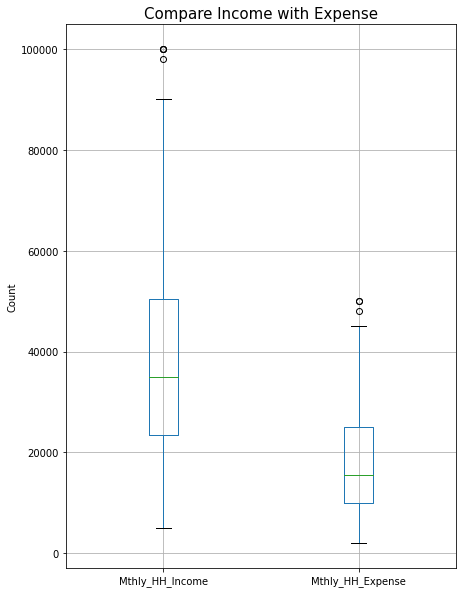

In [ ]:
# Tương quan giữa thu nhập và chi tiêu hàng tháng


plt.figure(figsize=(7, 10))
plt.title('Compare Income with Expense', fontsize=15)
dt[['Mthly_HH_Income', 'Mthly_HH_Expense']].boxplot()
plt.ylabel('Count')

Text(0, 0.5, 'Count')

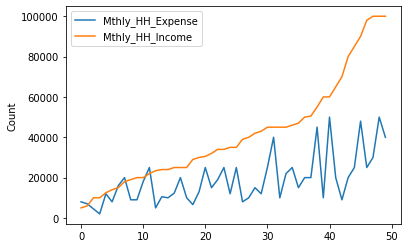

In [ ]:
dt[["Mthly_HH_Expense", "Mthly_HH_Income"]].plot()
plt.ylabel('Count')